In [1]:
import sys
sys.path.insert(1, '../')
from OUvAAxelrod import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 256
np.random.seed(seed)

In [2]:
# if we want to run simulations with heterogenous populations - we need to set homogeneous to false, 
# and we have the option to set a value for M, E, and I for heterogenous populations (defaults are 1000, 0.1, 0.1 for homogenous)

# first number is median, second standard deviation
M = [1000, 2000]
E = [0.1, 0.00001]
I = [0.1, 0.00001]

# create a list of agents, default = 100
agents = get_agents(homogenous = False, number_of_agents = 100, M = M, E = E, I = I)

In [3]:
check_parameters(agents, M, E, I)

AGENTS PARAMETERS IN POPULATION
------------------------------
   M 		  E 	   I
------------------------------
| 2210.0 	 0.1 	 0.1 |
| 170.0 	 0.1 	 0.1 |
| 1561.0 	 0.1 	 0.1 |
| 810.0 	 0.1 	 0.1 |
| 1267.0 	 0.1 	 0.1 |
| 899.0 	 0.1 	 0.1 |
| 5448.0 	 0.1 	 0.1 |
| 887.0 	 0.1 	 0.1 |
| 1963.0 	 0.1 	 0.1 |
| 3519.0 	 0.1 	 0.1 |
| 1370.0 	 0.1 	 0.1 |
| 578.0 	 0.1 	 0.1 |
| 589.0 	 0.1 	 0.1 |
| 2440.0 	 0.1 	 0.1 |
| 3973.0 	 0.1 	 0.1 |
| 528.0 	 0.1 	 0.1 |
| 1908.0 	 0.1 	 0.1 |
| 4720.0 	 0.1 	 0.1 |
| 2581.0 	 0.1 	 0.1 |
------------------------------
The s.d. of M is: 1322.0
The s.d. of E is: 0.0
The s.d. of I is: 0.0
------------------------------
The mean of M is: 2175.0
The mean of E is: 0.1
The mean of I is: 0.1
------------------------------
The population s.d. parameters entered were: 2000, 1e-05, 1e-05


In [4]:
tournament_seed256_mm1000_me01_mi01_sdm2000_sde0_sdi0 = Tournament.create_play_tournament(
                 countries = agents, 
                 max_rounds = 100000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 1,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )

Tournament has started...
Tournament has ended. The simulation took 128 minutes.


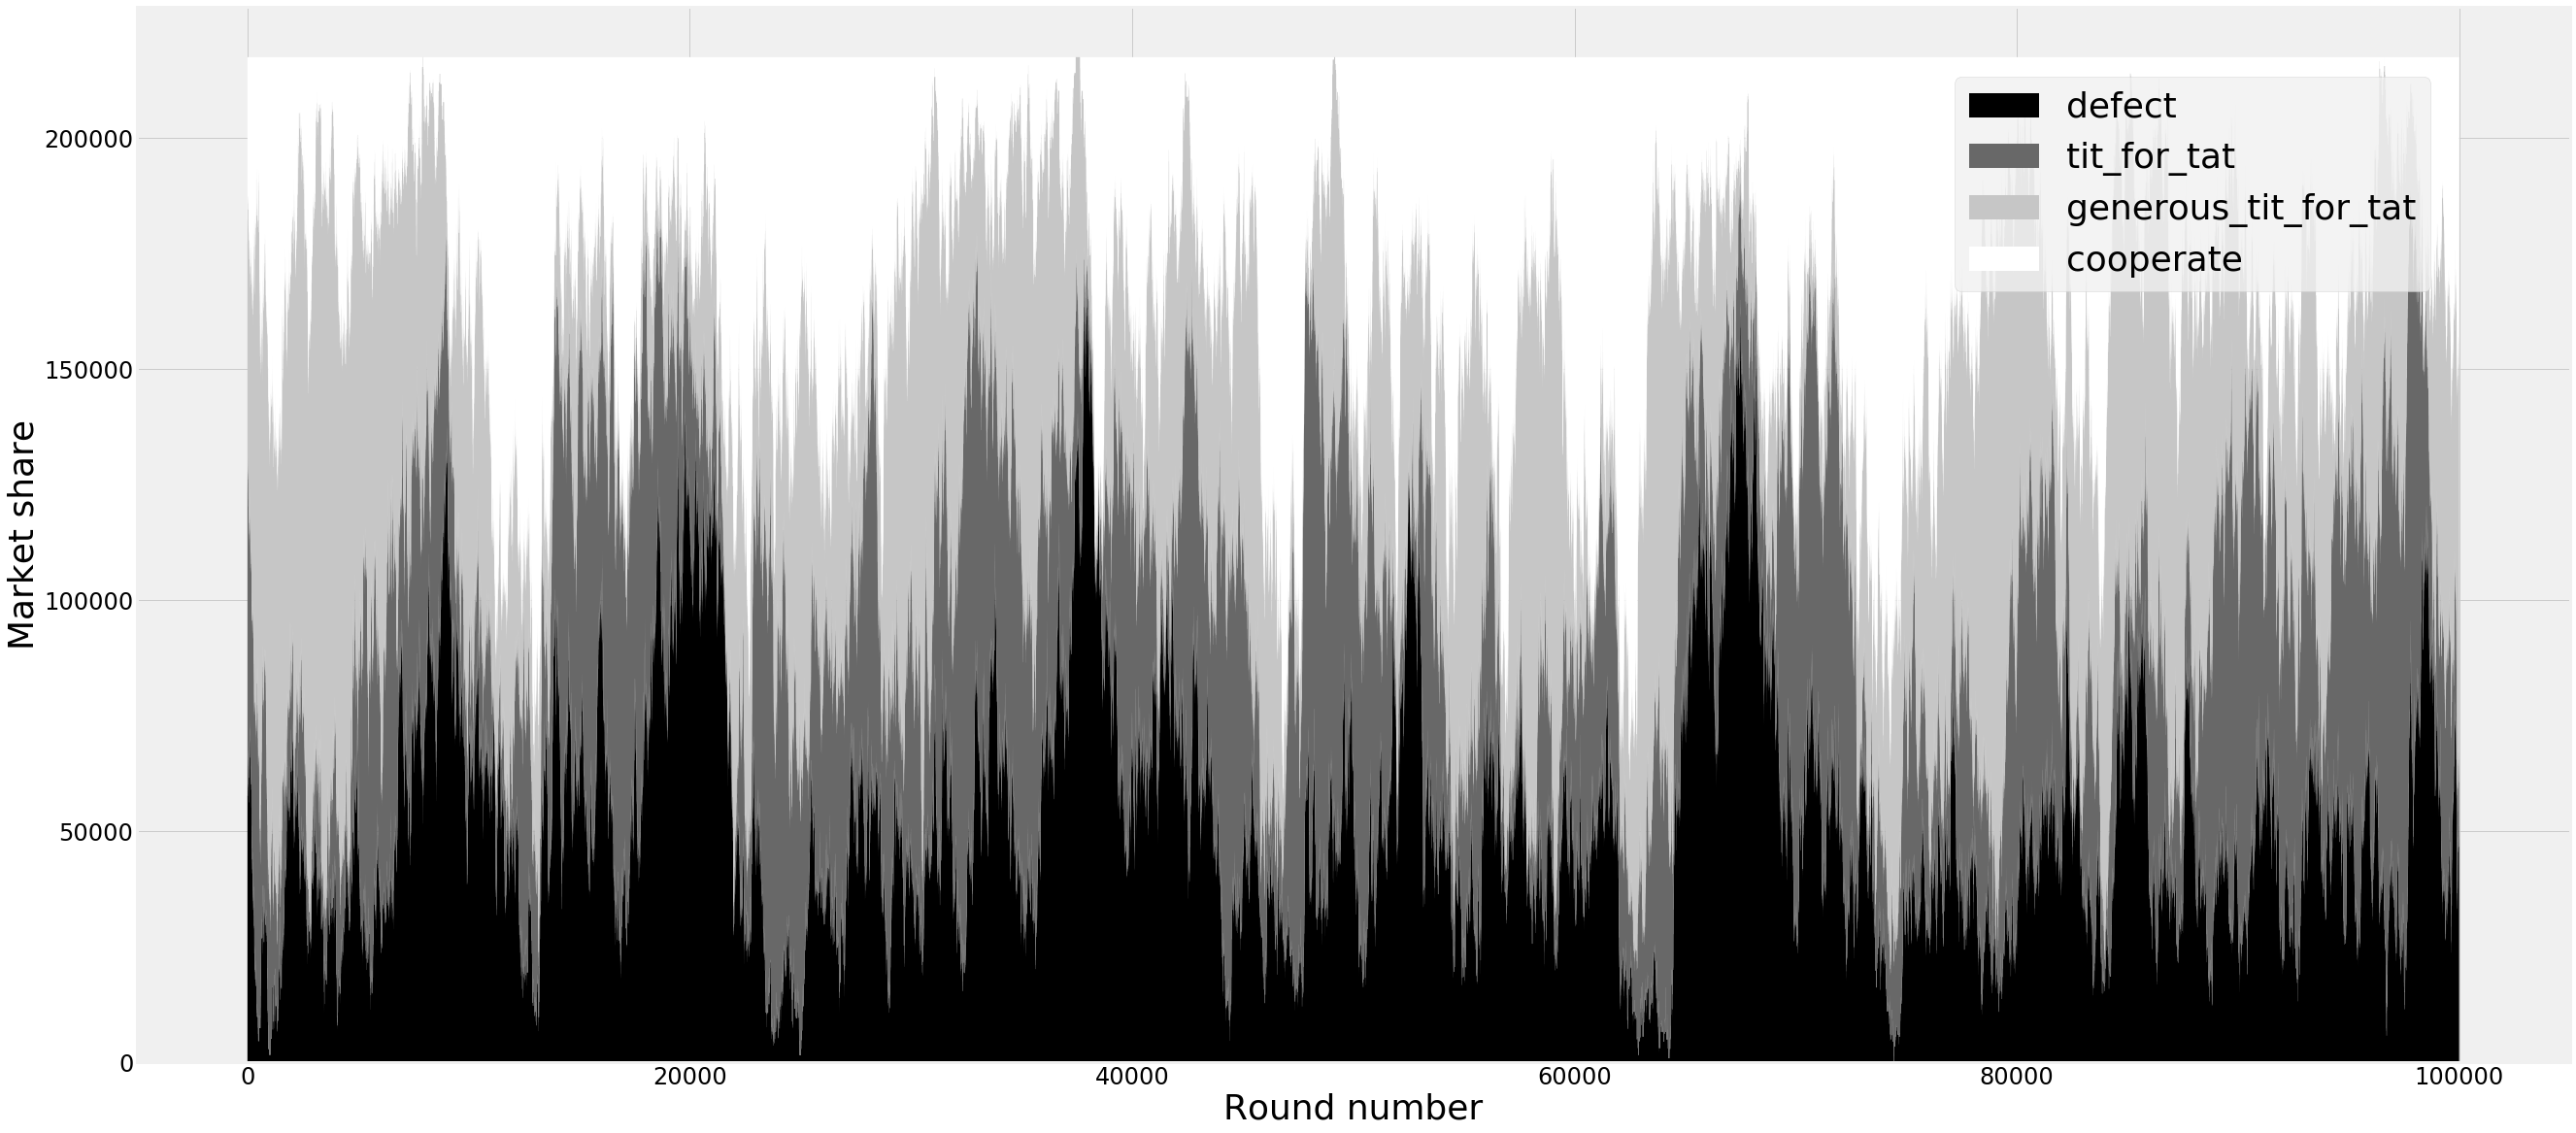

In [5]:
draw_stack(tournament_seed256_mm1000_me01_mi01_sdm2000_sde0_sdi0)

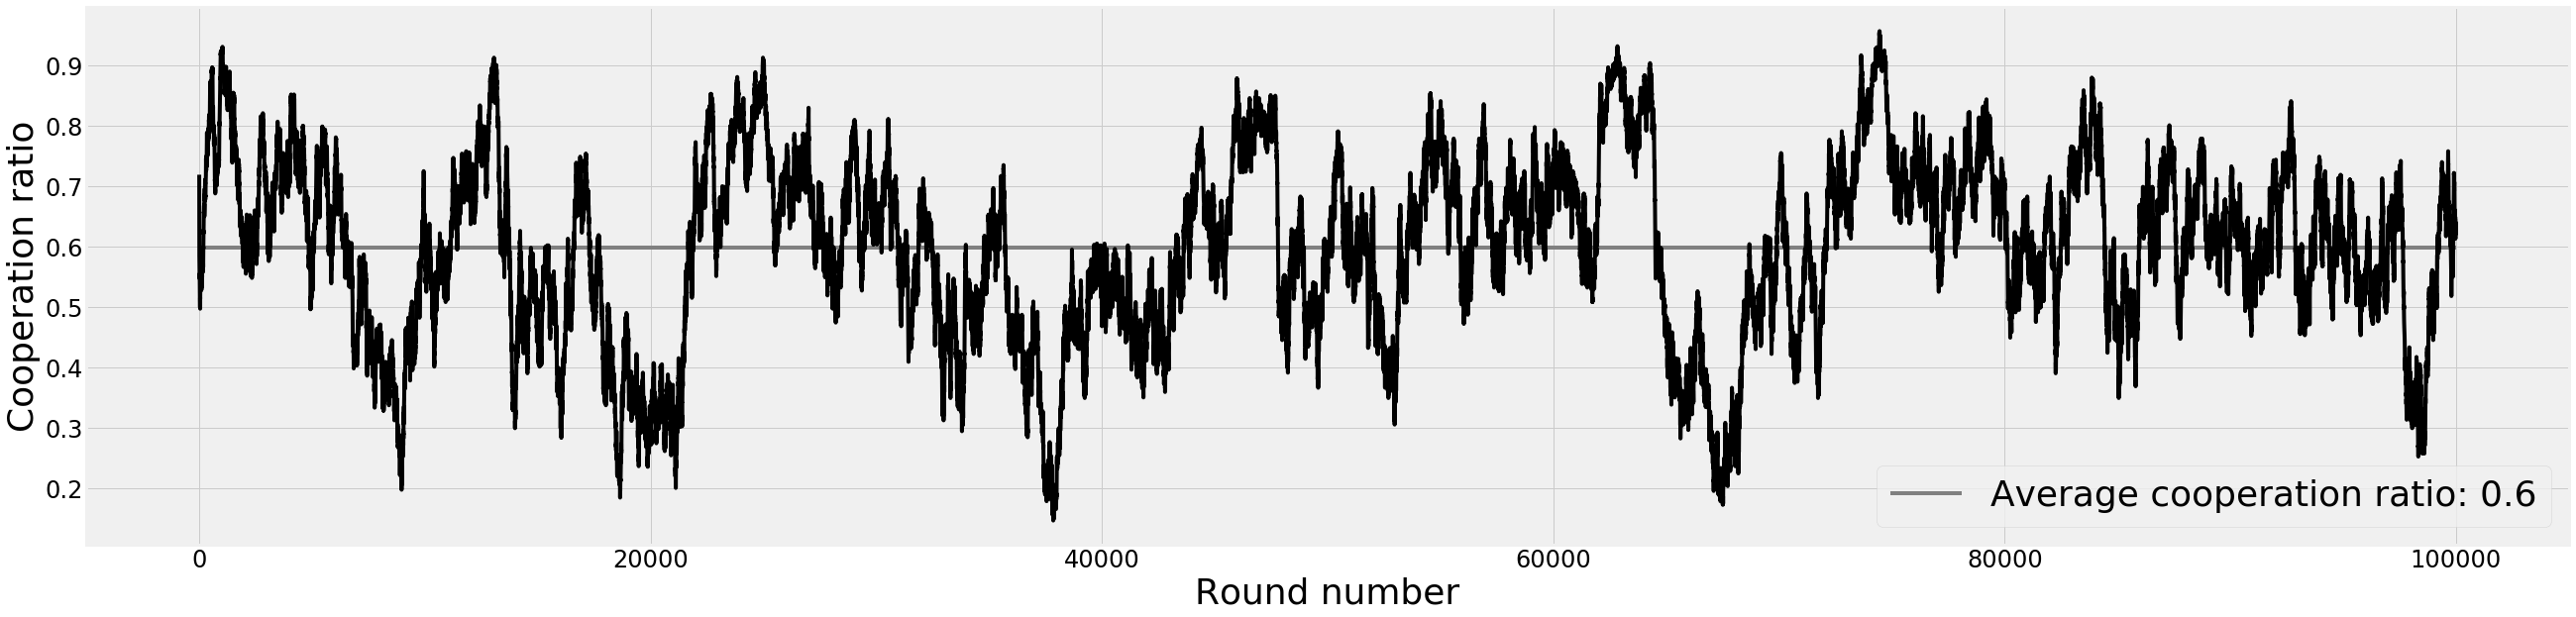

In [6]:
C_D_ratios_per_round(tournament_seed256_mm1000_me01_mi01_sdm2000_sde0_sdi0)

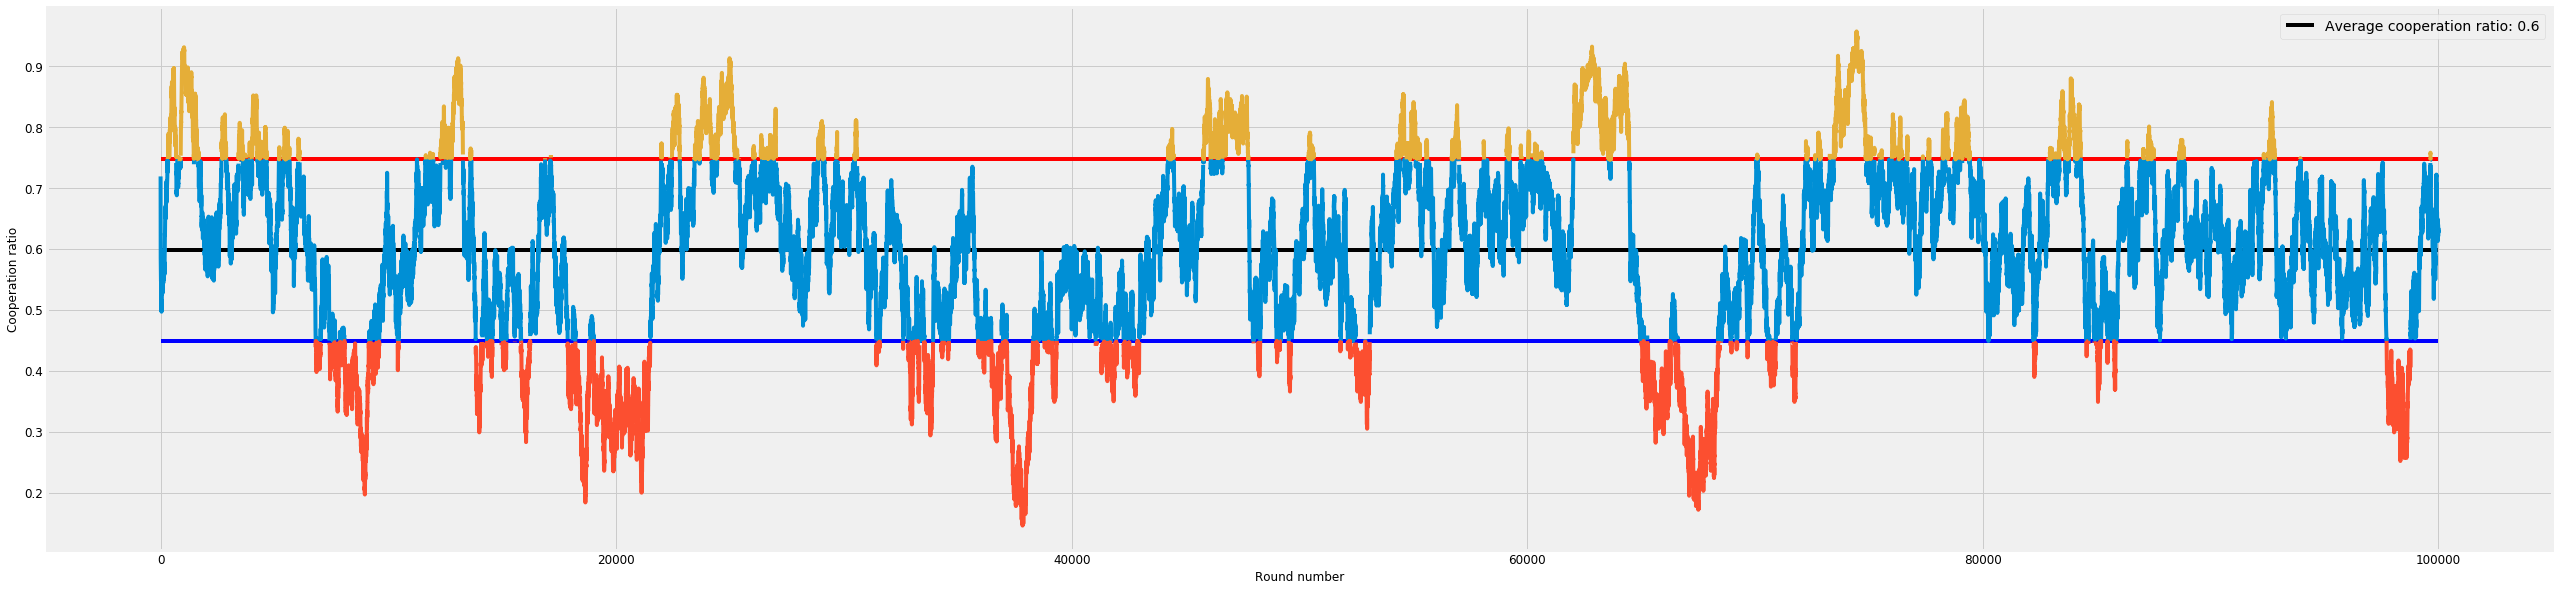

In [7]:
# we can change the constant of s.d.
C_D_ratios_per_round_var(tournament_seed256_mm1000_me01_mi01_sdm2000_sde0_sdi0, constant = 1)

In [8]:
outliers = count_outliers(tournament_seed256_mm1000_me01_mi01_sdm2000_sde0_sdi0, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values())}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("Data/data_seed256_mm1000_me01_mi01_sdm2000_sde0_sdi0_outlier_counts.csv", encoding='utf-8', index = False, float_format='%.1f')

    S.D.  Counts
0    0.5    1033
1    0.6     953
2    0.7     834
3    0.8     860
4    0.9     773
5    1.0     703
6    1.1     590
7    1.2     523
8    1.3     415
9    1.4     384
10   1.5     375
11   1.6     327
12   1.7     275
13   1.8     205
14   1.9     185
15   2.0     116
16   2.1     117
17   2.2      86
18   2.3      47
19   2.4      62
20   2.5      46
21   2.6      43
22   2.7      22
23   2.8      14
24   2.9      10
25   3.0       4


In [9]:
save_cooperate_csv(tournament_seed256_mm1000_me01_mi01_sdm2000_sde0_sdi0, type_of_tournament= "seed256_mm1000_me01_mi01_sdm2000_sde0_sdi0", seed = str(seed))